In [2]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

from dtaidistance import dtw

df = pd.read_csv("Data/data_clean.csv")


DTW C variant not available.

If you want to use the C libraries (not required, depends on cython), then run `cd /anaconda3/lib/python3.6/site-packages/dtaidistance/..;python3 setup.py build_ext --inplace`.


In [3]:
df.user.unique()

array([  360,   406,   407,   411,   417,   418,   423,   427,   436,
         447,   466,   487,   500,   513,   827,   912,   917,   939,
         950,  1316,  1320,  2559,  2560,  2741,  2746,  2760,  2767,
        2768,  2787,  3775,  3994,  4001,  4025,  4039,  4055,  4057,
        4070,  4569,  4570,  4577,  4587,  4872,  4874,  4881,  4919,
        4925,  4927,  4930,  4940,  4942,  5184,  5200,  5203,  5206,
        5213,  5214,  5448,  5533,  5539,  5547,  5556,  5559,  5560,
        5792,  7959,  8976, 13849, 14026, 14027, 14032, 14057, 14059,
       15103, 15116, 15556, 15568, 17379, 19278])

In [4]:
cycle1 = df[(df.user == 360) & (df.cycle_number == 1)]
cycle2 = df[(df.user == 407) & (df.cycle_number == 3)]

In [5]:
cycle2

,Unnamed: 0,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,st_norm,hr_norm,br_norm
243,868,407,2016-11-04,2016-11-26,3,23,2016-11-04,1,35.266892,53.510193,14.116608,-0.093855,-0.343427,-0.793425
244,869,407,2016-11-04,2016-11-26,3,23,2016-11-05,2,35.128571,54.062090,14.214753,-0.300065,-0.253320,-0.741655
245,870,407,2016-11-04,2016-11-26,3,23,2016-11-06,3,35.056600,53.420050,14.221527,-0.407360,-0.358144,-0.738083
246,871,407,2016-11-04,2016-11-26,3,23,2016-11-07,4,34.989992,52.326460,14.178057,-0.506659,-0.536692,-0.761012
247,872,407,2016-11-04,2016-11-26,3,23,2016-11-08,5,34.934740,50.344926,14.047784,-0.589030,-0.860213,-0.829727
248,873,407,2016-11-04,2016-11-26,3,23,2016-11-09,6,34.814343,49.318119,14.018373,-0.768517,-1.027858,-0.845241
249,874,407,2016-11-04,2016-11-26,3,23,2016-11-10,7,34.881985,48.019216,13.901762,-0.667677,-1.239927,-0.906750
250,875,407,2016-11-04,2016-11-26,3,23,2016-11-11,8,34.899681,47.547286,14.009721,-0.641296,-1.316978,-0.849804
251,876,407,2016-11-04,2016-11-26,3,23,2016-11-12,9,35.034848,48.403395,14.006362,-0.439788,-1.177203,-0.851576
252,877,407,2016-11-04,2016-11-26,3,23,2016-11-13,10,35.076152,49.225866,13.879623,-0.378211,-1.042920,-0.918427


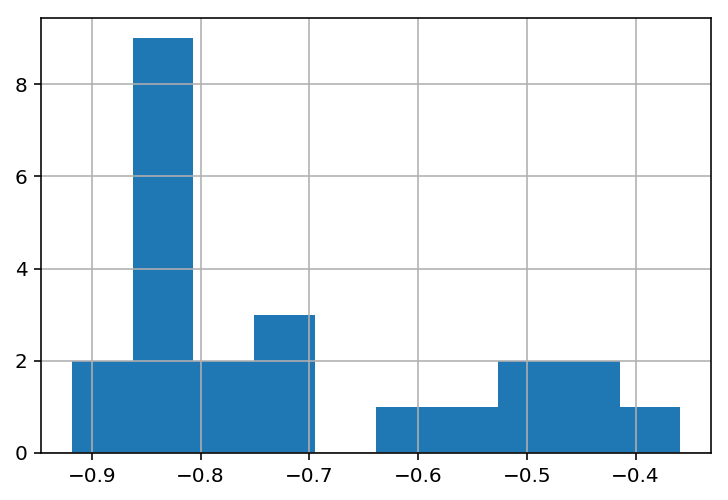

In [6]:
cycle2["br_norm"].hist()

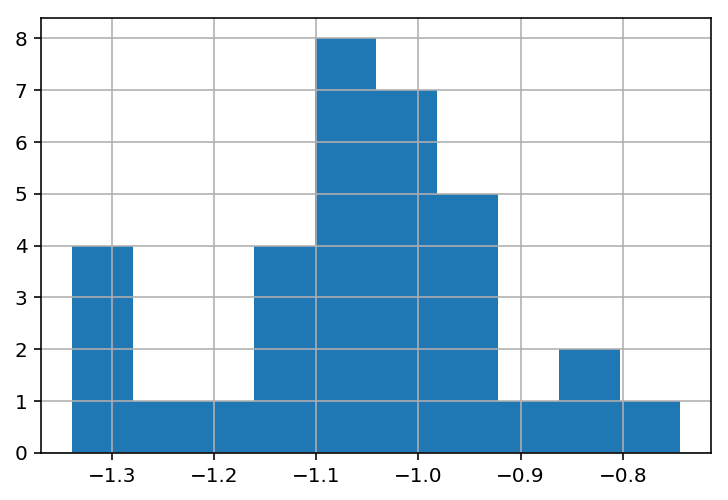

In [7]:
cycle1["br_norm"].hist()

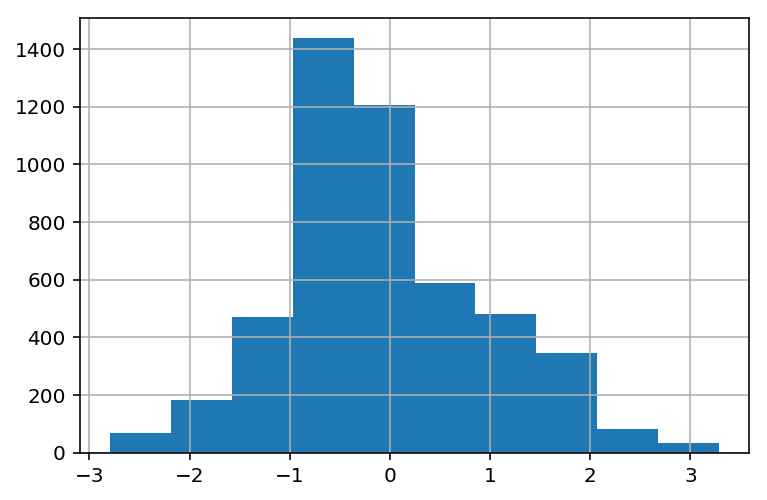

In [8]:
df["br_norm"].hist()

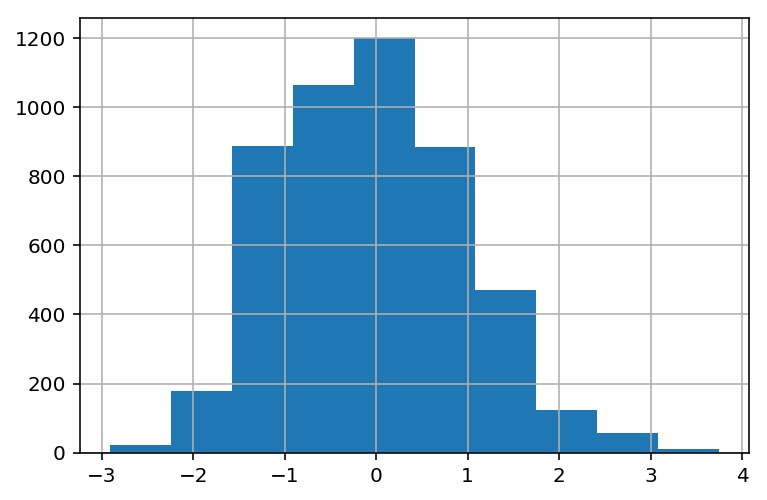

In [9]:
df["hr_norm"].hist()

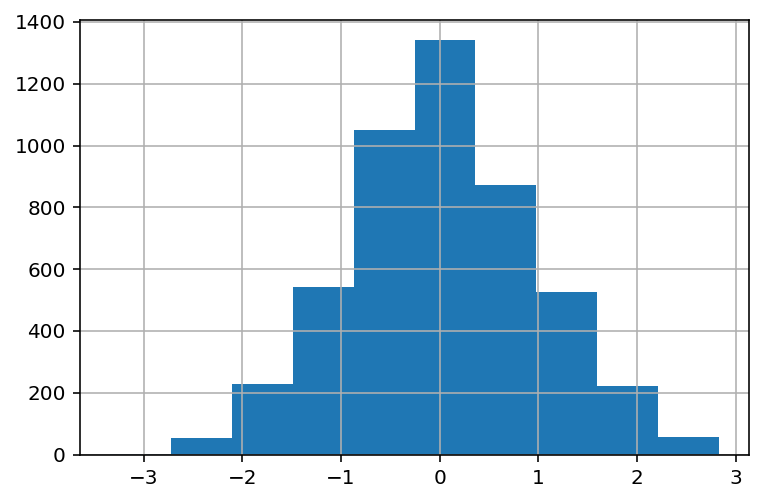

In [10]:
df["st_norm"].hist()

In [11]:
cluster_df = df[["user", "cycle_number","hr_norm", "br_norm", "st_norm"]]

In [12]:
cluster_df = cluster_df.groupby(["user", "cycle_number"]).max().reset_index()
cluster_df.head()

,user,cycle_number,hr_norm,br_norm,st_norm
0,360,1,-0.368245,-0.743632,-0.007453
1,360,3,0.499137,-0.784886,0.082786
2,406,5,-0.723366,-0.310245,0.615765
3,406,6,-0.770337,-0.165946,0.825571
4,406,8,-0.592617,-0.179222,0.893619


{360: 'r',
 406: 'g',
 407: 'b',
 411: 'r',
 417: 'g',
 418: 'b',
 423: 'r',
 427: 'g',
 436: 'b'}

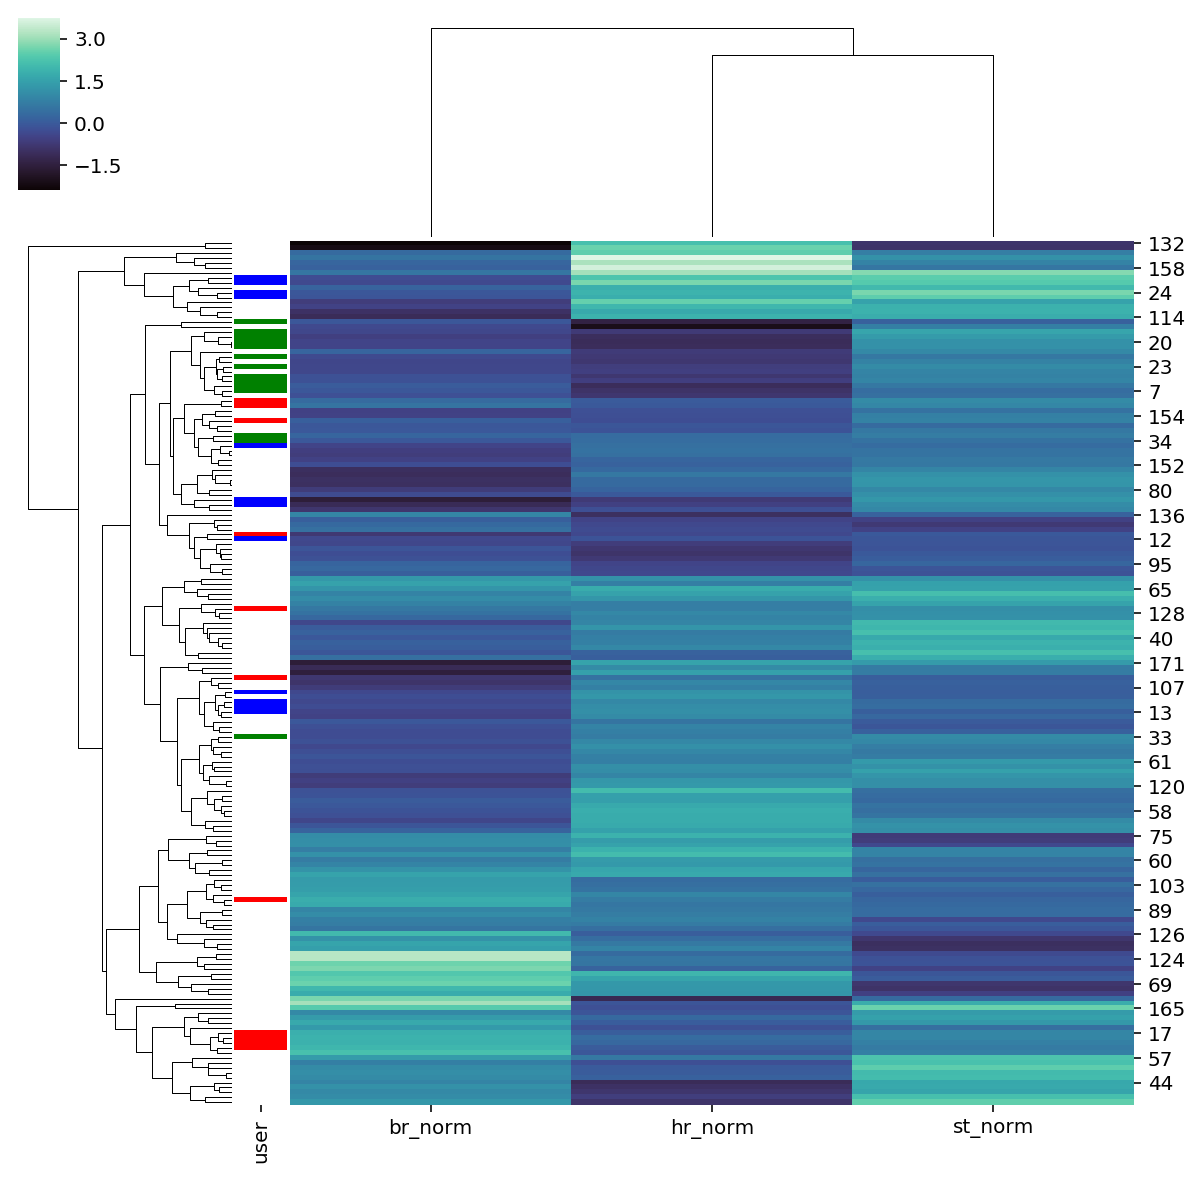

In [13]:
lut = dict(zip(cluster_df.user.unique(), "rgbrgbrgb"))
row_colors = cluster_df.user.map(lut)
cluster = cluster_df.drop(["user", "cycle_number"], axis = 1)
g = sns.clustermap(cluster, cmap = "mako", row_colors=row_colors)
lut

In [14]:
cluster_df.corr()

,user,cycle_number,hr_norm,br_norm,st_norm
user,1.000000,-0.390515,0.180476,0.007912,-0.004076
cycle_number,-0.390515,1.000000,-0.273826,-0.020984,-0.177480
hr_norm,0.180476,-0.273826,1.000000,-0.052577,0.054284
br_norm,0.007912,-0.020984,-0.052577,1.000000,-0.114881
st_norm,-0.004076,-0.177480,0.054284,-0.114881,1.000000


In [15]:
import random
colors = []
r = lambda: random.randint(0,255)
for col in range(len(cluster_df.user.unique())):
    print(col)
    colors[col] = r(),r(),r()
    
print('#%02X%02X%02X' % (r(),r(),r()))

0


IndexError: list assignment index out of range

### Time Series Distances (dtaidistance)

In [22]:
s1 = (cycle1["skin_temperature"].values)
s2 = (cycle2["skin_temperature"].values)

In [23]:
len(s1)

34

In [24]:
len(s2)

23

In [25]:
path = dtw.warping_path(s1, s2)

In [26]:
def plot_warping(s1, s2, path, filename=None):
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
    ax[0].plot(s1)
    ax[1].plot(s2)
    transFigure = fig.transFigure.inverted()
    lines = []
    line_options = {'linewidth': 0.5, 'color': 'orange', 'alpha': 0.8}
    for r_c, c_c in path:
        if r_c < 0 or c_c < 0:
            continue
        coord1 = transFigure.transform(ax[0].transData.transform([r_c, s1[r_c]]))
        coord2 = transFigure.transform(ax[1].transData.transform([c_c, s2[c_c]]))
        lines.append(mpl.lines.Line2D((coord1[0], coord2[0]), (coord1[1], coord2[1]),
                                      transform=fig.transFigure, **line_options))
    fig.lines = lines
    if filename:
        plt.savefig(filename)
    return fig, ax


(<matplotlib.figure.Figure at 0x10bebe128>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x10cd77080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cd977b8>], dtype=object))

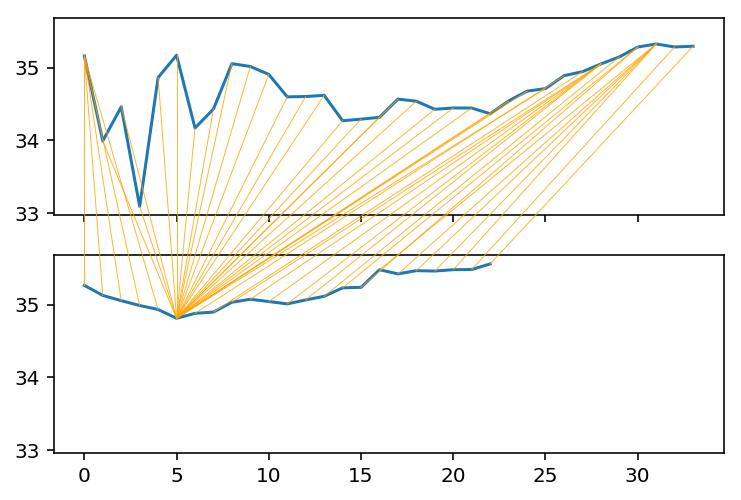

In [27]:
plot_warping(s1, s2, path, filename ="warp.png")

In [28]:
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print()
print(paths)

2.59349125028

[[ 0.                 inf         inf         inf         inf         inf
          inf         inf         inf         inf         inf         inf
          inf         inf         inf         inf         inf         inf
          inf         inf         inf         inf         inf         inf]
 [        inf  0.10689207  0.11141684  0.15200448  0.22805259  0.32054682
   0.47141151  0.54728543  0.60604237  0.61882991  0.62448448  0.63507993
   0.65207823  0.65868462  0.66013473  0.66415542  0.66890435  0.74225981
   0.78811496  0.8466596   0.89951741  0.95566436  1.0094002   1.08655167]
 [        inf  1.28135837  1.14357739  1.07240307  1.01147909  0.97187487
   0.8844728   1.00889318  1.06162178  1.20788823  1.25007107  1.22552104
   1.20332031  1.25897355  1.30474002  1.40739162  1.41510267  1.6348459
   1.61552061  1.6762007   1.69968865  1.74281728  1.77431073  1.86828015]
 [        inf  1.51425034  1.32467207  1.22718352  1.14192022  1.08162765
   0.95281232  0.9799

In [29]:
def plot_warpingpaths(s1, s2, paths, filename=None, shownumbers=False):
    """Plot the series and the optimal path.
    :param s1: Series 1
    :param s2: Series 2
    :param paths: Warping paths matrix
    :param filename: Filename to write the image to
    """
    from matplotlib import pyplot as plt
    from matplotlib import gridspec
    from matplotlib.ticker import FuncFormatter

    ratio = max(len(s1), len(s2))
    min_y = min(np.min(s1), np.min(s2))
    max_y = max(np.max(s1), np.max(s2))

    fig = plt.figure(figsize=(10, 10), frameon=True)
    gs = gridspec.GridSpec(2, 2, wspace=1, hspace=1,
                           left=0, right=1.0, bottom=0, top=1.0,
                           height_ratios=[1, 6],
                           width_ratios=[1, 6])
    max_s2_x = np.max(s2)
    max_s2_y = len(s2)
    max_s1_x = np.max(s1)
    min_s1_x = np.min(s1)
    max_s1_y = len(s1)




In [33]:
d, paths = dtw.warping_paths(s1, s2, psi=2)
plot_warpingpaths(s1, s2, paths)

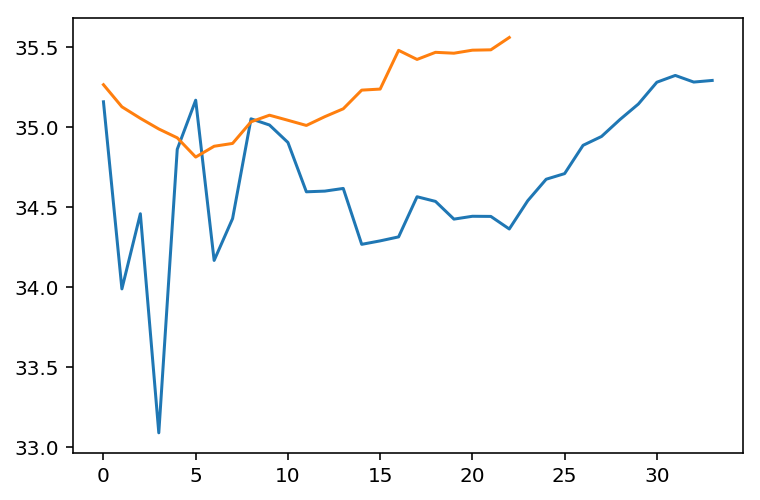

In [31]:
plt.plot(s1)
plt.plot(s2)